In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt
def loss_plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    #plt.legend(['Train'], loc='upper right')

In [25]:
data = pd.read_csv('data/q2_dataset.csv')

In [9]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/08/20,$381.37,29272970,376.72,381.50,376.36
1,07/07/20,$372.69,28106110,375.41,378.62,372.23
2,07/06/20,$373.85,29663910,370.00,375.78,369.87
3,07/02/20,$364.11,28510370,367.85,370.47,363.64
4,07/01/20,$364.11,27684310,365.12,367.36,363.91


In [8]:
data.tail()

,Date,Close/Last,Volume,Open,High,Low
1254,07/15/2015,$126.82,33559770,125.72,127.15,125.58
1255,07/14/2015,$125.61,31695870,126.04,126.37,125.04
1256,07/13/2015,$125.66,41365600,125.03,125.76,124.32
1257,07/10/15,$123.28,61292800,121.94,123.85,121.21
1258,07/09/15,$120.07,78291510,123.85,124.06,119.22


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [26]:
list(data.columns)

['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']

In [27]:
data.columns = data.columns.str.strip()
list(data.columns)

['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

In [28]:
data['target']= data['Open']
data['Date'] =pd.to_datetime(data.Date)
data=data.sort_values(by='Date')
data.reset_index(inplace=True, drop=True)
data.head()

,Date,Close/Last,Volume,Open,High,Low,target
0,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85
1,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94
2,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03
3,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04
4,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72


In [19]:
data.head(20)

,Date,Close/Last,Volume,Open,High,Low,target
0,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85
1,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94
2,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03
3,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04
4,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72
5,2015-07-16,$128.51,35987630,127.74,128.57,127.35,127.74
6,2015-07-17,$129.62,45970470,129.08,129.62,128.31,129.08
7,2015-07-20,$132.07,55204920,130.97,132.97,130.70,130.97
8,2015-07-21,$130.75,73006780,132.85,132.92,130.32,132.85
9,2015-07-22,$125.22,115288400,121.99,125.50,121.99,121.99


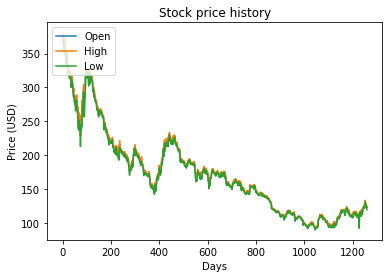

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
#plt.plot(data["Close"])
plt.title('Stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low'], loc='upper left')
plt.show()

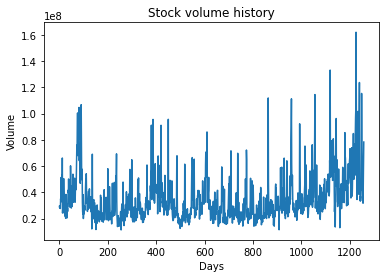

In [ ]:
plt.figure()
plt.plot(data["Volume"])
plt.title('Stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [29]:
#create features using columns from previous 3 days
data['Volume_t-3'] = data.shift(3)['Volume']
data['Volume_t-2'] = data.shift(2)['Volume']
data['Volume_t-1'] = data.shift(1)['Volume']
data['Open_t-3'] = data.shift(3)['Open']
data['Open_t-2'] = data.shift(2)['Open']
data['Open_t-1'] = data.shift(1)['Open']
data['High_t-3'] = data.shift(3)['High']
data['High_t-2'] = data.shift(2)['High']
data['High_t-1'] = data.shift(1)['High']
data['Low_t-3'] = data.shift(3)['Low']
data['Low_t-2'] = data.shift(2)['Low']
data['Low_t-1'] = data.shift(1)['Low']
data['target']= data['Open']
data.head()

,Date,Close/Last,Volume,Open,High,Low,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
2,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
3,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
4,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [30]:
data = data.drop(['Close/Last','Volume','Open','High','Low'], axis = 1)
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,2015-07-09,123.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-10,121.94,NaN,NaN,78291510.0,NaN,NaN,123.85,NaN,NaN,124.06,NaN,NaN,119.22
2,2015-07-13,125.03,NaN,78291510.0,61292800.0,NaN,123.85,121.94,NaN,124.06,123.85,NaN,119.22,121.21
3,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
4,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04


In [31]:
data.isna().sum()

Date          0
target        0
Volume_t-3    3
Volume_t-2    2
Volume_t-1    1
Open_t-3      3
Open_t-2      2
Open_t-1      1
High_t-3      3
High_t-2      2
High_t-1      1
Low_t-3       3
Low_t-2       2
Low_t-1       1
dtype: int64

In [32]:
#drop columns with null values
data = data.dropna()
data.reset_index(inplace=True, drop=True)
data.head()

,Date,target,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,2015-07-14,126.04,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32
1,2015-07-15,125.72,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04
2,2015-07-16,127.74,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58
3,2015-07-17,129.08,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35
4,2015-07-20,130.97,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31


In [33]:
list(data.columns)

['Date',
 'target',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1']

In [34]:
data = data[[
 'Date',
 'Volume_t-3',
 'Volume_t-2',
 'Volume_t-1',
 'Open_t-3',
 'Open_t-2',
 'Open_t-1',
 'High_t-3',
 'High_t-2',
 'High_t-1',
 'Low_t-3',
 'Low_t-2',
 'Low_t-1', 
 'target']]
data.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
0,2015-07-14,78291510.0,61292800.0,41365600.0,123.85,121.94,125.03,124.06,123.85,125.76,119.22,121.21,124.32,126.04
1,2015-07-15,61292800.0,41365600.0,31695870.0,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04,125.72
2,2015-07-16,41365600.0,31695870.0,33559770.0,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58,127.74
3,2015-07-17,31695870.0,33559770.0,35987630.0,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35,129.08
4,2015-07-20,33559770.0,35987630.0,45970470.0,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31,130.97


## Dataset Creation

We sorted the dataset in ascending order, since our intention is to predict the opening price from the **previous** three days. Using the pandas shift function which shifts the index by desired number of periods, we were able to create new features by specifying the index that was needed. For example, to get the Volume from three days prior, we shift by 3 - data.shift(3)['Volume']. This process was repeated for all necessary columns and indices. 


In [35]:
len(data)

1256

In [36]:
from sklearn.model_selection import train_test_split
#split the data into train and test set
train, test = train_test_split(data, test_size=0.30, random_state=0)
#save the data
train.to_csv('train_data_RNN.csv',index=False)
test.to_csv('test_data_RNN.csv',index=False)


In [ ]:
type(train)

pandas.core.frame.DataFrame

In [38]:
train.head()

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
689,2018-04-09,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20,169.88
1134,2020-01-14,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15,316.70
901,2019-02-11,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42,171.05
579,2017-10-27,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78,159.29
367,2016-12-23,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64,115.59


In [40]:
data_train = pd.read_csv('train_data_RNN.csv')
data_test = pd.read_csv('test_data_RNN.csv')

## Preprocessing

**Scaling the data**

The range of the data is widely varied. The values of Volume are very high and could skew the model. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently. We utilise the Minmax scaler to keep feature values between 0 and 1. 

Scaled values of X are created using the following formula:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

We also tried the Standard scaler, however there was no significant difference in training or test loss with this scaler. 

**Splitting Features and Target**

The target is the opening price of the day we wish to predict. 

In [41]:
#separate features and target
X_train = data_train.drop(['Date','target'], axis = 1)
y_train = data_train['target']
X_test_date = data_test
X_test = data_test.drop(['Date','target'], axis = 1)
y_test = data_test['target']


In [ ]:
X_train


,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,34581850.0,26750260.0,34949690.0,164.88,172.58,170.97,172.01,174.23,172.48,164.77,172.08,168.20
1,42621540.0,35217270.0,30521720.0,307.24,310.60,311.64,310.43,312.67,317.07,306.20,308.25,311.15
2,28204640.0,31644240.0,23793830.0,174.65,172.40,168.99,175.57,173.94,170.66,172.85,170.34,168.42
3,17633730.0,21175670.0,16916650.0,156.29,156.91,157.23,157.42,157.55,157.83,156.20,155.27,156.78
4,21337310.0,23724430.0,26043820.0,116.74,116.80,116.35,117.50,117.40,116.51,116.68,116.78,115.64
...,...,...,...,...,...,...,...,...,...,...,...,...
874,20182050.0,20670830.0,15955820.0,189.69,191.78,190.68,192.55,192.43,191.96,189.69,190.17,189.56
875,36487930.0,38016810.0,52954070.0,211.15,216.88,219.05,215.18,220.45,222.36,209.27,216.62,216.81
876,28803760.0,33511990.0,36486560.0,303.22,305.64,308.10,305.17,310.35,317.05,301.97,304.29,307.24
877,35907770.0,25402270.0,21983410.0,151.78,153.80,153.89,153.92,154.72,154.28,151.69,153.54,152.70


In [42]:
X_test

,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1
0,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70
1,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62
2,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37
3,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77
4,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12
...,...,...,...,...,...,...,...,...,...,...,...,...
372,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80
373,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74
374,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33
375,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43


In [43]:
y_train

0      169.88
1      316.70
2      171.05
3      159.29
4      115.59
        ...  
874    192.45
875    209.55
876    317.83
877    153.21
878    167.88
Name: target, Length: 879, dtype: float64

In [44]:
y_test

0      132.85
1      144.49
2      116.44
3      191.81
4      108.91
        ...  
372    112.02
373    205.53
374    148.82
375    273.61
376    284.82
Name: target, Length: 377, dtype: float64

In [45]:
X_test_date

,Date,Volume_t-3,Volume_t-2,Volume_t-1,Open_t-3,Open_t-2,Open_t-1,High_t-3,High_t-2,High_t-1,Low_t-3,Low_t-2,Low_t-1,target
0,2015-07-21,35987630.0,45970470.0,55204920.0,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,132.85
1,2017-06-28,35421310.0,25674500.0,24725210.0,145.13,147.17,145.01,147.16,148.28,146.16,145.11,145.38,143.62,144.49
2,2015-09-25,50278030.0,35678360.0,50061580.0,113.38,113.63,113.25,114.18,114.72,115.50,112.52,113.30,112.37,116.44
3,2019-06-10,29773430.0,22526310.0,30684390.0,184.28,183.08,186.51,184.99,185.47,191.92,181.14,182.15,185.77,191.81
4,2016-04-08,26560420.0,26178840.0,31735810.0,109.51,110.23,109.95,110.73,110.98,110.42,109.42,109.20,108.12,108.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2015-12-17,64678220.0,53168580.0,56157370.0,112.18,111.94,111.07,112.68,112.80,111.99,109.79,110.35,108.80,112.02
373,2019-08-02,33935720.0,69281360.0,54017920.0,208.76,216.42,213.90,210.16,221.37,218.03,207.31,211.30,206.74,205.53
374,2017-07-17,24833800.0,25080500.0,20117070.0,145.87,145.50,147.97,146.18,148.49,149.33,144.82,145.44,147.33,148.82
375,2020-04-22,53812480.0,32503750.0,45247890.0,284.69,277.95,276.28,286.95,281.68,277.25,276.86,276.85,265.43,273.61


In [46]:
#scale the data 
#scaling the dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [50]:
X_train[:10]

array([[0.15426342, 0.12644697, 0.15606877, 0.26949793, 0.29492857,
        0.28369714, 0.28620284, 0.29059167, 0.28161701, 0.27437691,
        0.29461484, 0.27707898],
       [0.20767603, 0.19602151, 0.12662877, 0.78186072, 0.78785714,
        0.77656704, 0.77930961, 0.77786773, 0.7855027 , 0.78971724,
        0.78024251, 0.78358077],
       [0.11189569, 0.16666145, 0.08189741, 0.30466079, 0.29428571,
        0.27675975, 0.29888497, 0.28957094, 0.27527444, 0.30381869,
        0.28840942, 0.27785848],
       [0.04166663, 0.08063982, 0.03617348, 0.23858197, 0.23896429,
        0.23555587, 0.23422749, 0.23188202, 0.23056282, 0.24314969,
        0.23466476, 0.23661553],
       [0.06627179, 0.10158332, 0.0968568 , 0.09623898, 0.09571429,
        0.09232332, 0.09201667, 0.09056351, 0.0865656 , 0.09914735,
        0.09739658, 0.09084789],
       [0.06032861, 0.23632515, 0.11907544, 0.29656289, 0.29867857,
        0.29739673, 0.29019273, 0.29038049, 0.29806587, 0.29944614,
        0.29597004,

In [51]:
#numpy array conversion
X_train=np.array(X_train)
X_test=np.array(X_test)

In [52]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
X_train.shape

(879, 12, 1)

In [55]:
X_test.shape

(377, 12, 1)

## Design Steps

RNNs were not chosen because of the vanishing gradient problem. Long short-term memory (LSTM) is a deep learning system that avoids the vanishing gradient problem. LSTM is normally augmented by recurrent gates called “forget gates”.LSTM prevents backpropagated errors from vanishing or exploding. Instead, errors can flow backwards through unlimited numbers of virtual layers unfolded in space. 

Gated recurrent units (GRUs) are a gating mechanism in recurrent neural networks introduced in 2014. They are used in the full form and several simplified variants. They have fewer parameters than LSTM, as they lack an output gate.

LSTMs and GRUs take 3D input so data was reshaped.
We considered various RNN architectures but the following gave the best performance for our problem. 

**Step 1: Model Architecture**

MODEL 1

LSTM LAYER 1 - 50 units --> 
Dropout 0.2 --> 
LSTM LAYER 2 - 50 units -->
Dropout 0.2 -->
LSTM LAYER 3 - 50 units -->
Dropout 0.2 -->
Dense Layer - 1 unit

This model uses three LSTM layers. 20 % of the nodes at each layer are unused to avoid overfitting and improve model performance. 


MODEL 2

GRU Layer 75 units --> 
GRU Layer 30 units --> 
GRU Layer 30 units --> 
Dropout 0.2 --> 
Dense Layer - 1 layer

This model uses three GRU layers. 20 % of the nodes at the final GRU layer are unused to avoid overfitting and improve model performance. 

**Step 2: Optimizers considered**

Adagrad - Resulted in poor model performance. Model did not train. 

Stochastic Gradient Descents - Resulted in poor model performance. Model did not train.

Adam: Model performed well with this. It is also recommended as the best optimizer for LSTMs as referenced in [1]

**Step 3: Number of Epochs**

| Epochs  | Model 1 Training Loss | Model 2 Training Loss|
| --- | --- | --- |
| 100 | 13621 | 18898 |
|  256 | 4851 | 8759 |
|  512  | 4203 | 4312 |
|  800 | 1033 | 2159 |
|  1500 | 189 | 292 |

**Step 4: Runtime**

Model 1 - 13 min 26s for 1500 epochs
Model 2 - 12 min 26s for 1500 epochs

Model 2 has a shorter run time, perhaps because of the smaller width in its 2nd and 3rd layer.


**Step 5: Loss Metric**

Mean Squared Error. 

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

## Model #1

In [57]:
model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(12,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [58]:
model.compile(loss='mean_squared_error',optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 12, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [60]:
%%time
history = model.fit(X_train,y_train,validation_split=0.05,epochs=1500,batch_size=64,verbose=1)


Epoch 1/1500
14/14 [==============================] - 7s 142ms/step - loss: 33012.8359 - val_loss: 33627.8398
Epoch 2/1500
14/14 [==============================] - 0s 31ms/step - loss: 31456.1758 - val_loss: 31396.8242
Epoch 3/1500
14/14 [==============================] - 0s 30ms/step - loss: 30037.9141 - val_loss: 30665.1504
Epoch 4/1500
14/14 [==============================] - 0s 31ms/step - loss: 29497.0449 - val_loss: 30262.4941
Epoch 5/1500
14/14 [==============================] - 0s 31ms/step - loss: 29174.7969 - val_loss: 29956.0996
Epoch 6/1500
14/14 [==============================] - 0s 31ms/step - loss: 28859.5156 - val_loss: 29674.6270
Epoch 7/1500
14/14 [==============================] - 0s 29ms/step - loss: 28613.3301 - val_loss: 29407.0371
Epoch 8/1500
14/14 [==============================] - 0s 30ms/step - loss: 28323.5156 - val_loss: 29148.5254
Epoch 9/1500
14/14 [==============================] - 0s 31ms/step - loss: 28114.5859 - val_loss: 28899.8750
Epoch 10/1500
14/1

In [62]:
print(history.history["loss"][-1])

189.47265625


In [63]:
print('Training MSE for Model 1', model.evaluate(X_train, y_train, verbose=0))

Training MSE for Model 1 24.01258659362793


In [83]:
model.predict(X_train) - y_train.values

array([[   2.95023071, -143.86976929,    1.78023071, ..., -144.99976929,
          19.62023071,    4.95023071],
       [ 147.15701782,    0.33701782,  145.98701782, ...,   -0.79298218,
         163.82701782,  149.15701782],
       [   4.44254028, -142.37745972,    3.27254028, ..., -143.50745972,
          21.11254028,    6.44254028],
       ...,
       [ 143.92276489,   -2.89723511,  142.75276489, ...,   -4.02723511,
         160.59276489,  145.92276489],
       [ -14.04496277, -160.86496277,  -15.21496277, ..., -161.99496277,
           2.62503723,  -12.04496277],
       [   0.6628772 , -146.1571228 ,   -0.5071228 , ..., -147.2871228 ,
          17.3328772 ,    2.6628772 ]])

In [64]:
#save for the best model
model.save('models/Group3_RNN_model.h5')


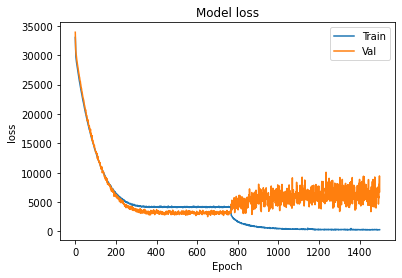

In [ ]:
loss_plot(history)

## Comment on Model #1 Training Output

- The training and validation losses start at a high value of approximately 35000
- There is a drastic decrease in the first 200 epochs
- The gap between training and validation loss remains steady until about 800 epochs
- The final training loss achieved is approximately 189


In [85]:
y_test=np.array(y_test)
y_pred = model.predict(X_test, verbose = 0)

In [87]:
y_pred[:20]

array([[130.02972 ],
       [147.80804 ],
       [114.17725 ],
       [188.1433  ],
       [111.11356 ],
       [114.54795 ],
       [116.98694 ],
       [152.87953 ],
       [116.82906 ],
       [160.26447 ],
       [172.04114 ],
       [248.34659 ],
       [176.55379 ],
       [154.58133 ],
       [190.42662 ],
       [285.1028  ],
       [233.29152 ],
       [333.38208 ],
       [120.063614],
       [195.56525 ]], dtype=float32)

In [88]:
#calculate test loss/mse
mean_squared_error(y_pred, y_test)

21.196446387090102

In [ ]:
score = model.evaluate(X_test, y_test, verbose=False) 
print('Metric Names',model.metrics_names)
print('Test Score:', score)


In [90]:
score = model.evaluate(X_train, y_train, verbose=False) 
print('Metric Names',model.metrics_names)
print('Training Score:', score)


Metric Names ['loss']
Training Score: 24.01258659362793


In [99]:
result_array=pd.DataFrame({'y_test':y_test, 'y_predicted':y_pred.ravel(),'Date':X_test_date["Date"]},index=None)


In [101]:
#result_array = result_array.sort_values(by=['Date'])
result_array=result_array.reset_index(drop=True, inplace=False)
result_array

,y_test,y_predicted,Date
0,132.85,130.029724,2015-07-21
1,144.49,147.808044,2017-06-28
2,116.44,114.177254,2015-09-25
3,191.81,188.143295,2019-06-10
4,108.91,111.113564,2016-04-08
...,...,...,...
372,112.02,110.918327,2015-12-17
373,205.53,215.097290,2019-08-02
374,148.82,149.203873,2017-07-17
375,273.61,281.391571,2020-04-22


In [103]:
result_array['Date'] =pd.to_datetime(result_array.Date)


In [104]:
result_array=result_array.sort_values(by='Date')
result_array

,y_test,y_predicted,Date
45,125.72,124.952179,2015-07-15
357,127.74,126.632896,2015-07-16
0,132.85,130.029724,2015-07-21
128,125.32,126.351768,2015-07-24
241,123.38,124.806816,2015-07-28
...,...,...,...
49,319.25,326.039917,2020-05-29
34,344.72,347.023743,2020-06-12
76,351.46,345.197784,2020-06-16
236,365.00,348.616974,2020-06-24


## Comments about y_true/y_pred dataframe

The model has a good output. The predicted values of y and close to the true values. From the 10 values shown above, the largest value of |y_pred - y_true| is 12, although most have a difference of less than 5.

In [105]:
result_array=result_array.reset_index(drop=True, inplace=False)

Text(0.5, 1.0, 'Stock price over time')

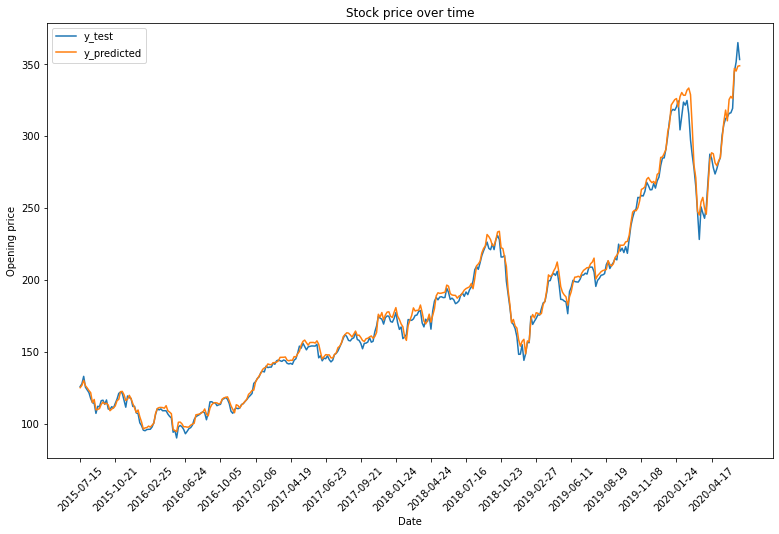

In [106]:
result_array.iloc[0:,0:2].plot.line(figsize=(13,8))
plt.xticks(np.arange(0, 377, step=20), result_array["Date"].dt.date.iloc[lambda x: x.index % 20 == 0],rotation=45)
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.title('Stock price over time')

## Comments about Stock Price over time plot

The plots of y_test(y_true) and y_pred mostly overlap. The largest gaps in both plots occurs sometime in 2020. This could be due to the Coronavirus pandemic.

## Model #2

In [108]:
model_1 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.GRU(75, return_sequences=True, input_shape=(12,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(30, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(30),
    tf.keras.layers.Dropout(0.2),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [109]:
model_1.compile(optimizer='adam', loss='mean_squared_error')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)

In [110]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 12, 75)            17550     
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 75)            0         
_________________________________________________________________
gru_4 (GRU)                  (None, 12, 30)            9630      
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 30)            0         
_________________________________________________________________
gru_5 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [111]:
%%time
history = model_1.fit(X_train,y_train,validation_split=0.05,epochs=1500,batch_size=64,verbose=1)


Epoch 1/1500
14/14 [==============================] - 7s 105ms/step - loss: 32972.9375 - val_loss: 33685.1328
Epoch 2/1500
14/14 [==============================] - 0s 29ms/step - loss: 31869.0391 - val_loss: 32045.0938
Epoch 3/1500
14/14 [==============================] - 0s 31ms/step - loss: 30799.3828 - val_loss: 31518.3359
Epoch 4/1500
14/14 [==============================] - 0s 29ms/step - loss: 30369.4609 - val_loss: 31242.7559
Epoch 5/1500
14/14 [==============================] - 0s 30ms/step - loss: 30169.4355 - val_loss: 31045.9004
Epoch 6/1500
14/14 [==============================] - 0s 30ms/step - loss: 29960.1289 - val_loss: 30867.7832
Epoch 7/1500
14/14 [==============================] - 0s 29ms/step - loss: 29794.9316 - val_loss: 30699.9551
Epoch 8/1500
14/14 [==============================] - 0s 30ms/step - loss: 29637.6504 - val_loss: 30536.5566
Epoch 9/1500
14/14 [==============================] - 0s 30ms/step - loss: 29473.1191 - val_loss: 30372.2676
Epoch 10/1500
14/1

In [112]:
print(history.history["loss"][-1])

292.26800537109375


In [113]:
print('training MSE', model_1.evaluate(X_train, y_train, verbose=0))

training MSE 89.08911895751953


In [114]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


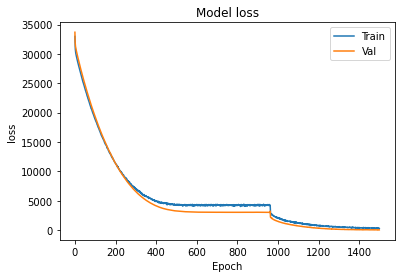

In [115]:
loss_plot(history)

## Comment on Model #2 Training Output

- The training and validation losses start at a high value of approximately 35000
- There is a drastic decrease in the first 200 epochs
- The training and validation losses continue to decrease
- The final training loss achieved is approximately 292

In [116]:
y_test=np.array(y_test)
y_pred = model_1.predict(X_test, verbose=0)


In [117]:
y_pred[:20]

array([[125.660934],
       [144.5896  ],
       [110.064964],
       [184.48605 ],
       [107.21594 ],
       [113.757805],
       [112.20062 ],
       [149.78496 ],
       [111.87024 ],
       [156.93988 ],
       [168.75972 ],
       [245.05467 ],
       [173.32153 ],
       [151.28717 ],
       [186.90234 ],
       [283.3356  ],
       [228.92291 ],
       [302.5869  ],
       [116.39398 ],
       [191.75362 ]], dtype=float32)

In [118]:
#calculate test loss/mse
mean_squared_error(y_pred, y_test)

52.513931808736615

In [119]:
score = model_1.evaluate(X_test, y_test, verbose=False) 
print('Metric Names',model_1.metrics_names)
print('Test Score for Model 2:', score)


Metric Names ['loss']
Test Score for Model 2: 52.5139274597168


In [120]:
score = model_1.evaluate(X_train, y_train, verbose=False) 
print('Metric Names',model_1.metrics_names)
print('Training Score for Model 2:', score)


Metric Names ['loss']
Training Score for Model 2: 89.08911895751953


In [121]:
result_array=pd.DataFrame({'y_test':y_test, 'y_predicted':y_pred.ravel(),'Date':X_test_date["Date"]},index=None)


In [ ]:
result_array=result_array.reset_index(drop=True, inplace=False)
result_array

In [124]:
result_array['Date'] =pd.to_datetime(result_array.Date)


In [125]:
result_array=result_array.sort_values(by='Date')
result_array

,y_test,y_predicted,Date
45,125.72,120.705017,2015-07-15
357,127.74,122.633720,2015-07-16
0,132.85,125.660934,2015-07-21
128,125.32,123.803505,2015-07-24
241,123.38,120.971870,2015-07-28
...,...,...,...
49,319.25,302.511902,2020-05-29
34,344.72,302.652496,2020-06-12
76,351.46,302.647675,2020-06-16
236,365.00,302.658325,2020-06-24


## Comments about y_true/y_pred dataframe

The model has a fairly good output, though not as good as Model #1. The predicted values of y are close to the true values. From the 10 values shown above, there are much larger values of |y_pred - y_true| than model #1. Some datapoints have a difference of over 40. 

In [126]:
result_array=result_array.reset_index(drop=True, inplace=False)

Text(0.5, 1.0, 'Stock price over time')

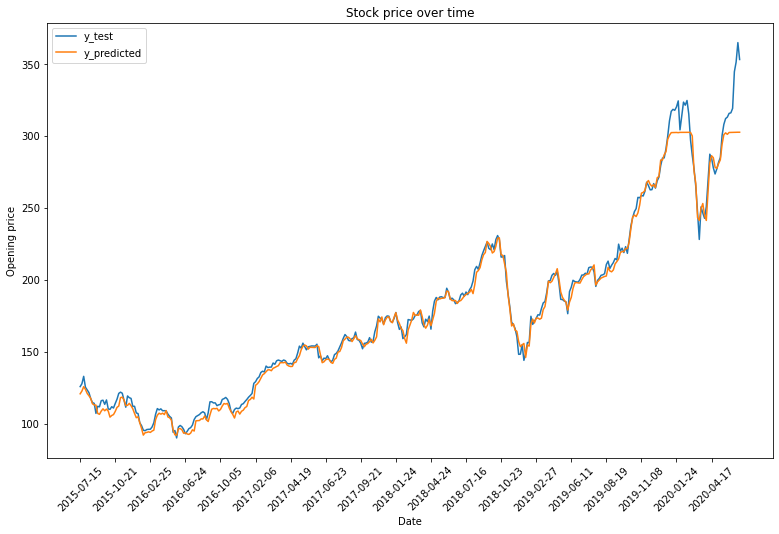

In [127]:
result_array.iloc[0:,0:2].plot.line(figsize=(13,8))
plt.xticks(np.arange(0, 377, step=20), result_array["Date"].dt.date.iloc[lambda x: x.index % 20 == 0],rotation=45)
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.title('Stock price over time')

## Comments about Stock Price over time plot

The plots of y_test(y_true) and y_pred mostly overlap. There is significant variation in the plots in 2019 and 2020. The plot for Model #1 seems to be more accurate.

## Final Network Architecture

Model #1 is chosen because it has a better performance. 

MODEL 1

LSTM LAYER 1 - 50 units --> 
Dropout 0.2 --> 
LSTM LAYER 2 - 50 units --> 
Dropout 0.2 --> 
LSTM LAYER 3 - 50 units --> 
Dropout 0.2 --> 
Dense Layer - 1 unit

This model uses three LSTM layers. 20 % of the nodes at each layer are unused to avoid overfitting and improve model performance. 

Optimizer - **Adam**

Loss Metric - **Mean Squared Error**

Activation Function in Dense layer - **Linear**

Batch Size - **64**

Number of Epochs - **1500**

The model utilises Early Stopping in order to converge faster and avoid overfitting.

## Effect of Adding More Features

 After increasing the features to 40 i.e (using data from the latest 10 days) we observed the following:
 
 - The model trained for a longer time with the same number of epochs. 
 - The model performance was significantly improved. The training loss was approximately 15 using Model #1 as compared to 189 using Model #1 with 12 Features
 - The final plot of predicted values against true values in the test set are almost identical.
 - External Resources suggest that the prices and volumes are not the best features for stock prediction. Return value is suggested to be a better input. 

### References

1 "LSTM Optimizer Choice ?" https://deepdatascience.wordpress.com/2016/11/18/which-lstm-optimizer-to-use/